In [10]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from scipy import signal
from scipy.signal import butter, filtfilt
import pandas as pd

In [11]:
esp = serial.Serial("COM9", 115200)

In [12]:
#Adquisición
l = []
seg = 8
muestras = seg*500   #está muestreando a 1000 muestras en un segundo
for i in range(muestras): 
    data = esp.readline().decode('utf-8')
    data = float(data)
    l.append(data)
len(l)

4000

In [14]:
#Límites
l_reposo = []
for i in range(2000):
    if i > 1000:
        l_reposo.append(l[i])
l_max = max(l_reposo)
l_min = min(l_reposo)
print('Límite superior: ',l_max)
print('Límite inferior: ',l_min)

Límite superior:  399.0
Límite inferior:  227.0


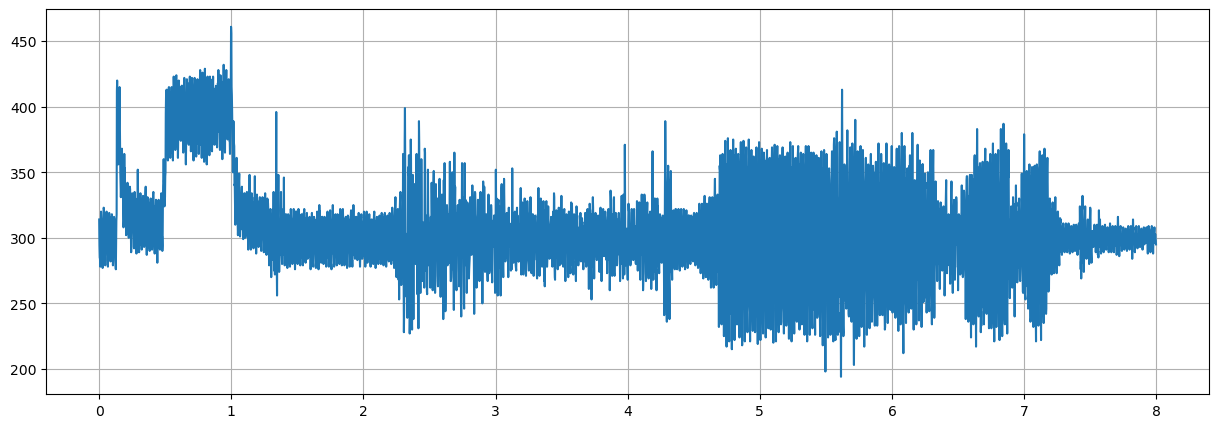

In [15]:
#Gráfico
tiempo = np.arange(0, seg, 0.002)  #Desde cero hasta      segundos en un muestreo de    
fm = 500 # 500[Hz] frecuencia de muestreo
T = 1/fm # Periodo del muestreo
largo_señal = len(l) # Largo de la señal 1
duracion_señal = T * largo_señal
tiempo_señal = np.arange(0, duracion_señal, T)

plt.figure(figsize = (15,5))
plt.plot(tiempo,l) # l
plt.grid()
plt.show()

In [1]:
Data = {"Señal": l, 'Tiempo': tiempo}
Data1 = pd.DataFrame(Data)
Data1.to_csv("abre y cierrrede mano 22-11-2023")
Data1

NameError: name 'l' is not defined

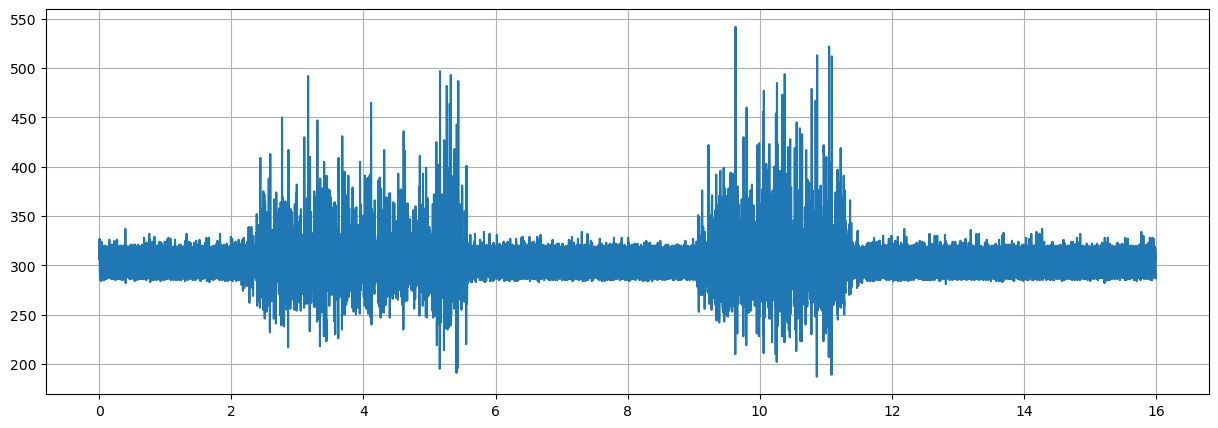

In [10]:
df = pd.read_csv('Puño máximo ferni 3')
plt.figure(figsize = (15,5))
plt.plot(df['Tiempo'],df['Señal'])#,'b')
plt.grid()
plt.show()